<h1><center>ECE 449 - Intelligent Systems Engineering<br><br>
Lab 5-D42: Genetic Algorithms</center></h1>
<hr>
<b>Lab date:</b> <i>Thursday, December 2, 2021 -- 2:00 - 4:50 PM</i>
<br>
<b>Room:</b> <i>ETLC E5-013</i>
<br>
<b>Lab report due:</b> <i>Tuesday, December 7, 2021 -- Midnight</i>
<hr>

<h2>1. Objectives</h2>
The objective of this lab is to become familiar with the principles of genetic algorithms (GA), and implement them in some typical applications

<h2>2. Expectations</h2>
Complete the pre-lab, and hand it in before the lab starts.  A formal lab report is required for this lab, which will be the completed version of this notebook.  There is a marking guide at the end of the lab manual.  If figures are required, label the axes and provide a legend when appropriate.  An abstract, introduction, and conclusion are required as well, for which cells are provided at the end of the notebook.  The abstract should be a brief description of the topic, the introduction a description of the goals of the lab, and the conclusion a summary of what you learned, what you found difficult, and your own ideas and observations.

<h2>3. Pre-lab</h2>
1. Describe and compare roulette wheel (fitness proportional) and ranked selection mechanisms.

<h2>4. Introduction</h2>
A genetic algorithm is a type of evolutionary algorithm based on the concept <i>evolution</i>. The essence of evolution are variation and selection, that can be seen as a series of mapping functions connecting genetics and behavior. Selection and mutation are two of those functions. A common application is optimization problems that involve many variables acting simultaneously. 
<br>

Unlike classical search and optimization methods, a GA begins its search with an initial set of randomly generated candidate solutions to the problem, referred to as <i>individuals</i> in a <i>population</i> of solutions, where each individual competes for survival. Also, GA utilizes random variation to find new solutions. 
<br>

Typically, an individual is represented by binary strings, but other encodings can be used (e.g. integers or real numbers).  The method of representation scheme has a major impact on the performance of the GA, as different schemes may cause different performance in terms of accuracy and computation time.
<br>

Once a random population is <b>initialized</b>, each individual is <b>evaluated and assigned a fitness value</b>, according to a fitness function defined by the user.  This marks the completion of a generation worth of individuals, leading to <b><i>crossover</i> and <i>mutation</i></b> of individuals in the current generation. These operations are performed only on selected members of the population, <i>parents</i>, typically based on fitness. Crossover is analogous to reproduction, and involves the mixing of two parents' genetic information. Mutation consists of changing an individual's representation (e.g. flipping 0 to 1). Both operations are used to introduce new genetic information into the population such that other solutions are explored, and the algorithm does not settle with a local minimum/maximum. The modified individuals are then <b>evaluated</b>, the low-fit individuals are <b>discarded</b>. This procedure is repeated until the maximum number of generations is reached, or a stopping criteria is met, and the best fit individual is chosen as the solution.

![alt text](GA-diagram.png "Genetic Algorithm execution")

<h2>5. Experimental Procedure</h2>
If you have not yet installed the pyeasy library, run the cell below.

In [ ]:
!pip install pyeasyga

Run the cell below to import the libraries required to complete this lab.

In [1]:
import numpy as np              # General math operations
import matplotlib.pyplot as plt # Data visualization
from pyeasyga import pyeasyga   # Genetic algorithms
import random                   # RNG for GA implementation

<h4>Exercise 1:&nbsp;&nbsp; Mathematical genetic algorithm</h4>
Create a simple genetic algorithm to determine the global minimum of the function: 

<center>$f(x, y) = -[1 + cos(15r)]e^{-r^2}$, where $r = \sqrt{x^2 + y^2}$</center>

The cell below plots the fitness function to illustrate that there are several local minima, and so traditional gradient descent algorithms could easily get stuck in one of these trenches.

C:\Users\Dariu\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  if __name__ == '__main__':


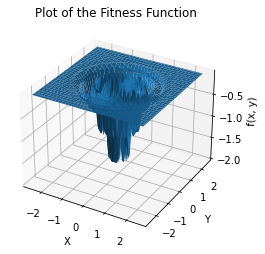

In [2]:
import matplotlib.pyplot as plt             # Data visualization
from mpl_toolkits.mplot3d import Axes3D     # 3D data visualization

x = np.linspace(-2.5, 2.5, num = 101)
y = np.linspace(-2.5, 2.5, num = 101)
[gX, gY] = np.meshgrid(x, y)
fcn = -(1+np.cos(15*np.sqrt(gX**2 + gY**2))) * np.exp(-gX**2 - gY**2)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot_surface(gX, gY, fcn)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('Plot of the Fitness Function')
plt.show()

The execution of any GA requires the definition of multiple functions: <i>create_individual</i>, <i>selection</i>, <i>crossover</i>, and <i>mutate</i>.  The cell below provides the individual creation, mutation, and crossover functions to be used, but the fitness function, along with the GA creation, needs to be programmed.  The GA should be initially built with the following parameters:
<ul>
    <li>Population size: 30</li>
    <li>Generations: 50</li>
    <li>Crossover probability: 0.8</li>
    <li>Mutation probability: 0.005</li>
    <li>Selection: tournament</li>
</ul>
As for the fitness function, look at the <i>create_individual</i> function and understand how each individual is represented.  In addition, think about whether you wish to maximize or minimize the fitness value in your function, and program the GA according to this answer.  It is worth noting that there is no need for input data in this application, so you can initialize the GA with an arbitrary variable.
<br>
<ol>
    <li>Complete the GA, according to the above parameters, and run the GA a few times to confirm your results.  What was the best fitness value and solution that the GA found?</li>
</ol>

In [3]:
def create_individual(data):
    """ Create a candidate solution representation
        Represented as an array of x and y floating-point values from -10 to 10
    """
    individual = np.zeros((2,))
    individual[0] = random.uniform(-10, 10)  # X value
    individual[1] = random.uniform(-10, 10)  # Y value
    return individual

def crossover(parent_1, parent_2):
    """ Crossover two parents to produce two children
        Performs a weighted arithmetic recombination
    """
    ratio = random.uniform(-1, 1)  # Generate a number from -1 to 1
    crossIndices = np.random.choice([0, 1], size=(len(parent_1),), p=[0.5, 0.5])  # Determine if x and/or y value is operated on
    child_1 = parent_1
    child_2 = parent_2
    for i in range(len(crossIndices)):
        if (crossIndices[i] == 1):
            child_1[i] = child_1[i] + ratio * child_2[i]  # Perform weighted sum
            child_2[i] = child_2[i] + ratio * child_1[i]
    return child_1, child_2

def mutate(individual):
    """ Mutate an individual to introduce new genetic information to the population
        Adds a random number from 0 to 9 to each allele in the individual (up to two decimal places)
    """
    mutateIndices = np.random.choice([0, 1], size=(4,), p=[0.8, 0.2])
    for index in range(len(mutateIndices)):
        if(mutateIndices[index] == 1):
            individual[0] += random.randint(1, 9) * (10**(index - 2))
            individual[1] += random.randint(1, 9) * (10**(index - 2))

def fitness(individual, data):
    """ Calculate fitness of a candidate solution representation
    """
    r = np.sqrt(individual[0]**2+individual[1]**2)
    out = -(1 + np.cos(15*r))*np.exp(-r**2)
    return out


Write your answer to question 1 below:

In [4]:
# code goes here
inputdata = np.random.rand(10,10)
ga = pyeasyga.GeneticAlgorithm(inputdata, 
                               population_size = 30,
                               generations = 50,
                               crossover_probability = 0.8,
                               mutation_probability = 0.005,
                               maximise_fitness = False
                               )

ga.create_individual = create_individual
ga.crossover_function = crossover
ga.mutate_function = mutate
ga.selection_function = ga.tournament_selection
ga.fitness_function = fitness
ga.run()
bestSoln = ga.best_individual()
print("Fitness = ", bestSoln[0])
print("Solution = ", bestSoln[1])

Fitness =  -1.9999999999999996
Solution =  [-1.64937535e-09 -1.56259910e-09]


<ol start=2>
    <li>Change both the crossover probability and mutation probability to 0, and run the GA a few times again.  Comment on how this affects the results, and provide a possible explanation as to why this GA setup does not return the optimal solution.</li>
</ol>

In [5]:
# code goes here
for i in range(8):
    ga = pyeasyga.GeneticAlgorithm(inputdata, 
                                   population_size = 30,
                                   generations = 50,
                                   crossover_probability = 0,
                                   mutation_probability = 0,
                                   maximise_fitness = False
                                   )

    ga.create_individual = create_individual
    ga.crossover_function = crossover
    ga.mutate_function = mutate
    ga.selection_function = ga.tournament_selection
    ga.fitness_function = fitness
    ga.run()
    bestSoln = ga.best_individual()
    print("Fitness = ", bestSoln[0])
    print("Solution = ", bestSoln[1])

Fitness =  -2.8233694885089223e-05
Solution =  [-0.97874918 -3.19445841]
Fitness =  -2.390938528258739e-05
Solution =  [2.7458182  1.40867175]
Fitness =  -0.0006401573939211236
Solution =  [-1.67871597 -2.03715273]
Fitness =  -0.0011719632568850636
Solution =  [-1.51247093 -1.80795638]
Fitness =  -0.2844331249899832
Solution =  [0.27742233 1.28781399]
Fitness =  -0.012211623720917313
Solution =  [-1.4176757   0.23239957]
Fitness =  -0.058991009643533855
Solution =  [-0.43743752 -1.48345712]
Fitness =  -0.001010563676100468
Solution =  [-1.54975138 -1.65092224]


<ol start=3>
    <li>Perform the previous task again, except with the crossover and mutation probability changed to 1.</li>
</ol>

In [6]:
# code goes here
for i in range(8):
    ga = pyeasyga.GeneticAlgorithm(inputdata, 
                                   population_size = 30,
                                   generations = 50,
                                   crossover_probability = 1,
                                   mutation_probability = 1,
                                   maximise_fitness = False
                                   )

    ga.create_individual = create_individual
    ga.crossover_function = crossover
    ga.mutate_function = mutate
    ga.selection_function = ga.tournament_selection
    ga.fitness_function = fitness
    ga.run()
    bestSoln = ga.best_individual()
    print("Fitness = ", bestSoln[0])
    print("Solution = ", bestSoln[1])

Fitness =  -1.9964853738936656
Solution =  [5.54157299e-03 6.85741583e-05]
Fitness =  -1.9998038154678874
Solution =  [ 0.00011901 -0.00130357]
Fitness =  -1.99118479185009
Solution =  [0.00443409 0.00757911]
Fitness =  -1.9718199134800174
Solution =  [0.01133413 0.01090122]
Fitness =  -1.9923484455083287
Solution =  [0.00738608 0.00351548]
Fitness =  -1.9982183740758463
Solution =  [-0.00115697  0.00377176]
Fitness =  -1.9477466422252416
Solution =  [-0.00192236 -0.0213721 ]
Fitness =  -1.683221129291776
Solution =  [4.12420021e-01 3.73388641e-04]


Since the mutation and probabilty is 1, the fitness now converges closer to 2, but the solutions are large compared to part 1 of the excersise. The search in this case is doing a blind search, since there is not one dominant parent, and the mutations are guarenteed.

<h4>Exercise 2:&nbsp;&nbsp; WSN genetic algorithm</h4>
A team of climatologists is trying to optimize the energy usage of their wireless sensor network (WSN) of weather monitoring stations.  Their current setup involves all stations sending their data directly to the base station (BS).  However, they would like to explore the option of assigning cluster heads (CH) to some of these stations.  These CH's would collect the data from nearby regular stations (RS) and send it to the BS such that not every station has to communicate with the BS, thereby optimizing the total communication distance of the network.  In order to determine the optimal setup of both number and location of CH's, they are designing a genetic algorithm with the following parameters:
<ul>
    <li>Individual representation: binary string</li>
    <li>Population size: 80</li>
    <li>Generations: 100</li>
    <li>Crossover: one-point with probability 0.7</li>
    <li>Mutation: bitwise with probability 0.05</li>
    <li>Selection: tournament</li>
</ul>
The GA has been built to solve the WSN routing optimization problem in the cell below.  The base station is located in the centre of a (250, 250) map, with 80 stations assigned randomly around it.
<br>
An individual is represented as a binary string, with length equal to the number of stations in the network.  A 0 represents a regular station, whereas a 1 represents a cluster head.  Parents are selected using tournament selection, in which individuals are randomly chosen to be compared to another individual, and the most fit individual "wins".  For crossover, a single-point method is used, where a point is chosen in a parent's string, and the genetic information is swapped with another parent starting at that point.  Finally, the mutation function flips on average two bits of a chosen parent anywhere in its string.
<br>
The GA aims to maximize a fitness function based on the communication distance difference between the previous method (all stations to BS) and the new method (RS to CH, and CH to BS), as well as the difference between the total number of stations and the number of CH's used.
<br>
Once it has undergone the specified number of generations, the GA determines what the best solution is, and the optimal routing scheme is displayed.
<br>
<ol>
    <li>Run the script to call the GA and determine the optimal clustering and routing for the WSN.  Include the plot of the final results in your report.</li>
</ol>

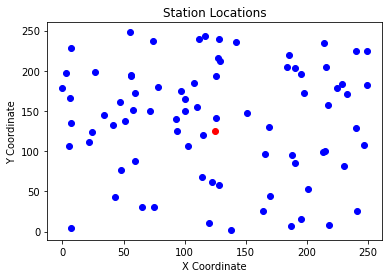

Fitness =  4850.735893224385
Solution =  [0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0]


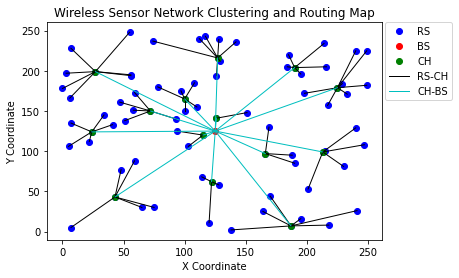

In [7]:
def create_individual(data):
    """ Create a candidate solution representation
        0 = regular station; 1 = cluster head
        Represented as a binary sequence with ~25% 1's
    """
    individual = np.random.choice([0, 1], size = (len(data),), p = [0.75, 0.25])
    return individual

def crossover(parent_1, parent_2):
    """ Crossover two parents to produce two children
        Implements single point crossover
    """
    index = random.randrange(1, len(parent_1))
    child_1 = np.append(parent_1[:index], parent_2[index:])
    child_2 = np.append(parent_2[:index], parent_1[index:])
    return child_1, child_2

def mutate(individual):
    """ Mutate an individual to introduce new genetic information to the population
        Flips on average 2 bits in the individual
    """
    noStations = len(individual)
    for i in range(noStations):
        if (random.randint(0, noStations) % noStations == 0):  # ~2 bits mutated within the individual
            individual[i] ^= 1  # Swap the current bit using XOR operator

def fitness(individual, data):
    """ Calculate fitness of a candidate solution representation
        Based on the difference between no clustering and clustering
    """
    totDist = np.sum(data[:, 2])  # Total distance of all stations to the base station (BS) [D]
    noStations = len(individual)  # Total number of stations [N]
    noCH = np.sum(individual)  # Total number of cluster heads (CH) [H_i]

    # If no CH's are assigned, return a fitness value of 0
    if (noCH == 0):
        fitness = 0
        return fitness

    chIndices = np.transpose(np.nonzero(individual))  # Find indices of the stations that are CH's
    minDist = np.zeros((noStations, 1))
    chBSDist = np.zeros((noCH, 1))

    # Get distance of each CH to the BS
    for k in range(noCH):
        chBSDist[k] = data[chIndices[k], 2]

    # Calculate the distance between each station and the CH's to determine the nearest CH
    temp = np.zeros((noCH, 1))
    for i in range(noStations):
        for j in range(noCH):
            temp[j] = distMap[i, chIndices[j]]  # Store distance between a station and each CH
        minDist[i] = np.amin(temp)  # Determine the closest CH to the current station

    newDist = np.sum(chBSDist) + np.sum(minDist)  # Sum of distances from stations to CH's + CH's to BS [distance_i]

    fitness = (totDist-newDist) + (noStations-noCH)  # Fitness value to be maximized [D-distance_i + N-H_i]
    return fitness

def mapRoute(individual, data):
    """ Displays the routed results given an individual and the input data
    """
    chIndices = np.transpose(np.nonzero(individual))  # Find indices of the stations that are CH's
    noCH = len(chIndices)
    noStations = len(individual)

    stationConnectivity = np.zeros((noStations+1, noStations+1))  # 0 = not connected; 1 = station-CH; 2 = CH-BS; last element refers to BS

    # Determine station-CH connectivity
    temp = np.zeros((noCH, 1))
    for i in range(noStations):
        for j in range(noCH):
            temp[j] = distMap[i, chIndices[j]]  # Store distance between a station and each CH
        if (np.amin(temp) == 0):  # Ignore if the current station is a CH
            continue
        chIndex = chIndices[np.argmin(temp)]
        stationConnectivity[i,chIndex] = 1
        stationConnectivity[chIndex, i] = 1

    # Begin plotting the data
    fig, ax = plt.subplots()
    stationHandle ,= plt.plot(data[:, 0], data[:, 1], 'bo', label = 'RS')  # Regular stations in blue
    bsHandle ,= plt.plot(bsCoords[0], bsCoords[1], 'ro', label = 'BS')  # Base station in red

    # Determine CH -> BS connectivity
    for k in range(noCH):
        chIndex = chIndices[k]
        stationConnectivity[chIndex, -1] = 2
        stationConnectivity[-1, chIndex] = 2
        chHandle ,= plt.plot(data[chIndex, 0], data[chIndex, 1], 'go', label = 'CH')  # Cluster heads in green

    # Plot station connections
    for i in range(1, len(stationConnectivity)):
        for j in range(i):
            if (stationConnectivity[i, j] == 1):
                rsCHHandle ,= plt.plot([data[i, 0], data[j, 0]], [data[i, 1], data[j, 1]], color = 'k', linewidth = 1, label = 'RS-CH')
            if (stationConnectivity[i, j] == 2):
                chBSHandle ,= plt.plot([bsCoords[0], data[j, 0]], [bsCoords[1], data[j, 1]], color = 'c', linewidth = 1, label = 'CH-BS')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Wireless Sensor Network Clustering and Routing Map')
    plt.legend(bbox_to_anchor = (1.01, 1), loc = 2, borderaxespad = 0., handles = [stationHandle, bsHandle, chHandle, rsCHHandle, chBSHandle])
    plt.show()


noStations = 80  # Number of stations to route

stationInfo = np.zeros((noStations, 3))  # [x, y, dist to BS]
distMap = np.zeros((noStations, noStations))  # Distance between stations
bsCoords = np.array([125, 125])  # Base station coordinates at (125, 125)

random.seed(1)  # Set seed for consistent coordinates

# Assign random station coordinates and calculate the distances between stations
for i in range(len(stationInfo)):
    stationInfo[i, 0] = random.randint(0, 250)
    stationInfo[i, 1] = random.randint(0, 250)
    stationInfo[i, 2] = np.linalg.norm(stationInfo[i, 0:2] - bsCoords)

    for j in range(i + 1):
        distMap[i, j] = np.linalg.norm(stationInfo[i, 0:2] - stationInfo[j, 0:2])
        distMap[j, i] = distMap[i, j]

# Show location of stations
stationPlt = plt.scatter(stationInfo[:, 0], stationInfo[:, 1], c = 'b')
bsPlt = plt.scatter(bsCoords[0], bsCoords[1], c = 'r')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Station Locations')
plt.show()

# Create the GA
ga = pyeasyga.GeneticAlgorithm(stationInfo,  # Input data
                               population_size = 80,
                               generations = 100,
                               crossover_probability = 1,
                               mutation_probability = 1,
                               maximise_fitness = True
                               )

# Set the appropriate parameters for the GA
ga.create_individual = create_individual
ga.crossover_function = crossover
ga.mutate_function = mutate
ga.selection_function = ga.tournament_selection
ga.fitness_function = fitness

# Run the network and print the best individual
ga.run()
bestSoln = ga.best_individual()
print("Fitness = ", bestSoln[0])
print("Solution = ", bestSoln[1])

# Display routing results
mapRoute(ga.best_individual()[1], stationInfo)

<ol start=2>
    <li>Summarize the pros and cons of using a GA as a problem solving technique.</li>
</ol>

Your summary goes here

The techiqne of this algorithm is to select the best fitness connected to a few local bests and make custer connections.
The pros of using the GE is that it is simplier and faster compared to other algorithms, GE tends to use bigger sizes of data. algorithms could be run for thousands of times over, but if time is the constraint for putting out data, then genetic algorithm is a good one to use. The cons of using GE is that it doesnt tend to find the optimal solution since it will be stuck on a local maximun, GE suffers from accuracy. Although the crossover algotithm tend to migate the effects of it. Compared to the tradiotional method of using vectors to determine the values, GE tends to use probability to determine its values. Genetic algorithsm are similar to fuzzy and artificial neural networks. With this in mind, it is no surprise that depending on the first initial steps of the algorithm help determine different local mins. 

<h2>Abstract</h2>

<h2>Introduction</h2>

<h2>Conclusion</h2>

<center>
<h3>Lab 5 Marking Guide</h3>
<hr>
</center>

\begin{array}{@{}clcc@{}}
\textbf{Exercise} & \textbf{Item}                   & \textbf{Total Marks}  & \textbf{Earned Marks} \\ 
\hline
                  & Pre-lab                         & 10                    &                       \\ 
                  & Abstract                        & 3                     &                       \\ 
                  & Introduction                    & 3                     &                       \\
                  & Conclusion                      & 4                     &                       \\
1                 & Mathematical\ genetic algorithm & 50                    &                       \\
2                 & WSN\ genetic algorithm          & 30                 	                        \\
\hline
                  & \textbf{TOTAL}                  & 100                    &
\end{array}